# [Practice MatPlotLib]

*KU LeeDongGyu*

NOTE : <br> 
- Unlike Jupyter Notebook, you can do step-by-step execution in Pycharm.
- Therefore, if you can, run on the Pycharm and figure out what it means.

## Examples
---

In [1]:
pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/1a/c0/69e3f695d7384012e90be1e16570c08953baae00fd98094179ef87c7d5a2/matplotlib-3.1.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c6/ea/e5474014a13ab2dcb5056608e0716c600c3d8a8bcffb10ed55ccd6a42eb0/kiwisolver-1.1.0-cp37-none-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
rcParams['figure.figsize'] = [10,6] #[x축,y축] 이게 내노트북이랑 잘맞음.


### Data for Plotting

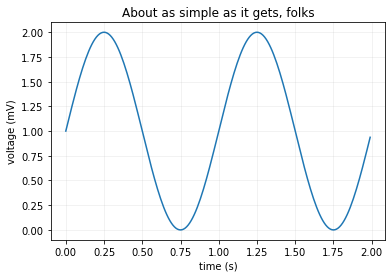

In [8]:
###단순 선그리기 ###
t = np.arange(0.0, 2.0, 0.01) #x축
s = 1 + np.sin(2 * np.pi * t) #y축
fig, ax = plt.subplots() #ax = plt.subplots() 라면,
ax.plot(t, s) #ax[1].plot(t,s)라 함 // 이처럼 변수 저장을 해도 되지만, 아래처럼 변수저장 안해도 됨.
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks') # 전체를 다 포현. 아래와비교 잘하기
ax.grid(alpha=0.2) #격자의 두께를 옵션.
#### 주피터에서는 여기까지 한꺼번에 실행시켜야함. 파이참처럼 그림에 단계별실행은 못함.
#fig.savefig("test.png") 그림저장함수.
plt.show()

Text(0, 0.5, 'Undamped')

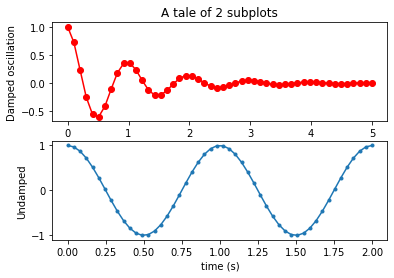

In [14]:
x1 = np.linspace(0.0, 5.0) # == np.linspace(0,5.0,50) 즉, 디폴트로 50개임.
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1) #(아래,오른쪽,'아래'옵션 개수 중 생성위치)
plt.plot(x1, y1, 'ro-') #마지막은 선의모양 - red , o모양, -선 // https://wikidocs.net/4760 참고
plt.title('A tale of 2 subplots') #그냥 각각으로 처리해서 넣을수도있음.
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

### Histogram

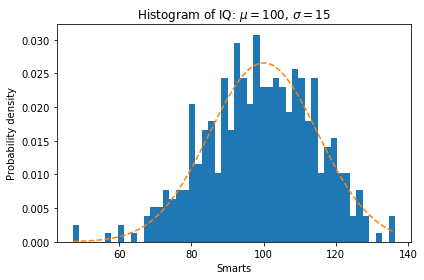

In [16]:
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437) #정규난수 437개 생성

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data                        #x는 데이터
n, bins, patches = ax.hist(x, num_bins, density=3) #density옵션은 색깔
                                                   #num_bins는 히스토그램 사각형 개수(구간수)
#n은 각 사각형들의 y값 / bins는 사각형들의 구간(51개의 점으로 표현) / patches는 사각형개수


# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) #그냥 정규곡선임.
ax.plot(bins, y, '--') #좌표, y값, --선분
ax.set_xlabel('Smarts') #ax로 했으면 set을 쓰는데 , 그중에서도 xlabel이렇게씀.
                        #plt.xlabel과 비교해서 알아놓기.
ax.set_ylabel('Probability density')
ax.set_title('Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout() #화면의 크기에 맞추는 명령어. 위에서 fig를 정의함.
plt.show()

In [2]:
#########################이 아래는 필요할 때 보고, SEABORN에 집중##########################

### 3D Plot

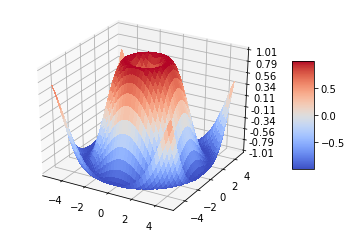

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure() #subplot은 2차원, figure은 3차원
ax = fig.gca(projection='3d') #얘까지 꼭 해야함.

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y) #meshgrid는 메틀랩처럼 x,y좌표들 만드는함수.
R = np.sqrt(X**2 + Y**2) # z = sin(root(x^2+y^2)) 그리는중
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# cmap -> 색깔을 주면서 변화를 관찰하는 변수.
# linewidth는 뭘까...
# antialiased(위신호제거) -> 높은해상도를 낮은해상도에서 나타낼때 깨짐현상최소화

# Customize the z axis.
ax.set_zlim(-1.01, 1.01) #z값 한계 설정
ax.zaxis.set_major_locator(LinearLocator(10)) #주요값 설정.(z값 10개)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) #자리수 설정.(2자리)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
#shirnk는 크기 , aspect는 slim size? (클수록 얇아짐)
plt.show()


### Bar Plot

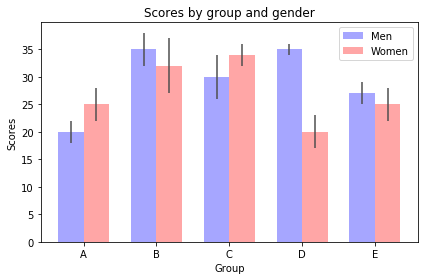

In [18]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 5
means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)
means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.35
error_config = {'ecolor': '0.3'}
rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men') #bar그래프
#index = 0,1,2,3,4 값을 벡터로 지님. (각 데이터의 인덱스) - x축
#means_men = 입력받을 y값 수치
#bar_width = 폭
#alpha = 불투명도 (opacity)  - 높을수록 어두움
#yerr = 막대값이 가지는 각각의 값에서 +- std_men만큼 각각 한것 이는 선분으로 표현됨.
#error_kw = 막대 위에 그려진 선분의 진한정도 (0에가까울수록 검정 1에가까울수록, 1보다 크면 흰색)
rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')
#추가할때 겹치지 않으려고 index+bar_width를 한것을 잊지말자!!!!

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
#기존에 위치가 0,1,2,3,4에서 , 중심위치가 막대의 사이로 바뀜. 그게 위의공식
#또한 함수는 set_xticks를 씀.
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E']) #== ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
#이름을 바꿔버림. 이건 인덱스를 붙이고 나중에 해야 이쁨.
ax.legend() #label을 위에서 정의했기에 레전드도 바로나옴.

fig.tight_layout() #완성된 그림을 가지고 조작할때는 fig에서 다룬다.
#tight하게 만듦.
#fig.savefig("test.png") 저장할때 이랬던 것처럼.
plt.show()

### Pie Plot

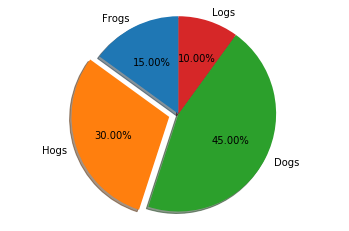

In [19]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
#sizes = 수치
#explode = 강조의역할로, hogs부분만 떼어내짐.
#labels = labels
#autopct = %자리수.자리수% %
#shadow = 있어보이게끔 아래에 그림자
#startangle = 해보고 이뻐보이는 각도로 회전하기.
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### ???

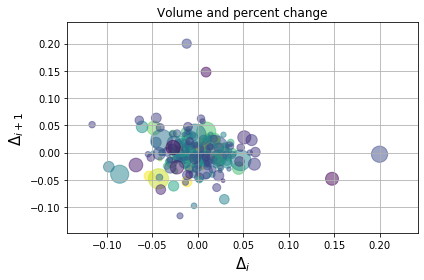

In [20]:
######확장된 그림. 물방울처럼 그림그리기 ###
##### 나중에 공부해보기. 아직 이부분까지는 다루기에 뭐한듯 ###
#어렵지는 않음.#
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

### Time Series

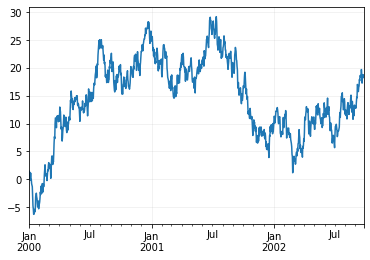

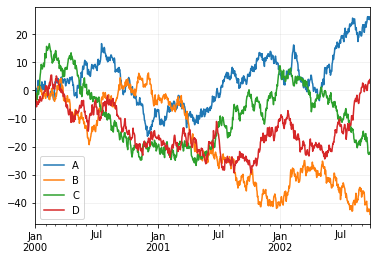

In [21]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
#Series = 벡터
ts = ts.cumsum()
ts.plot() #언젠간 다시 0을 터치함.
plt.grid(alpha=0.2)

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
#DataFrame 데이터프레임
#1000 x 4 데이터행렬
df = df.cumsum(0) #열별로 더함. 0은 써도되고 안써도되고
#plt.figure()
df.plot() #단순 플롯을 그릴때
plt.legend(loc='best') #최적의 위치에?
plt.grid(alpha=0.2) #뒤에 격자를 그릴때